# BIG DIVE Intesa 3
## Data Science and Scikit-learn
by Stefania Delprete, TOP-IX  
stefania.delprete@top-ix.org 

https://www.linkedin.com/in/astrastefania   
https://twitter.com/astrastefania  

---

## Exploring a big Effective Altruism survey

Effective Altruism https://www.effectivealtruism.com

In [1]:
import pandas as pd

In [2]:
survey = pd.read_csv('../../BDINTESA3/Data_Science/data/EA_imsurvey2017-anonymized-currencied.csv')

In [3]:
survey.shape

(2521, 218)

In [4]:
survey.head(5)

,id,referrer_url,heard_ea,is_ea,is_ea_comment,sincere,cause_import_animal_welfare,cause_import_cause_prioritization,cause_import_environmentalism,cause_import_ai,...,donate_sp_2016_c,donate_thl_2015_c,donate_thl_2016_c,donate_tlycs_2015_c,donate_tlycs_2016_c,plan_donate_how_much_c,income_2015_household_c,income_2015_individual_c,income_2016_household_c,income_2016_individual_c
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"\t """,EAs_sometimes_think_some_causes_are_more_impor...,EAs_sometimes_think_some_causes_are_more_impor...,EAs_sometimes_think_some_causes_are_more_impor...,EAs_sometimes_think_some_causes_are_more_impor...,Comments?,Do_you_identify_with_any_other_social_movement...,Do_you_identify_with_any_other_social_movement...,Do_you_identify_with_any_other_social_movement...,Do_you_identify_with_any_other_social_movement...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,http://survey.effectivealtruismhub.com/index.p...,Yes,Yes,But I am concerned EA looks cultish from the o...,Yes (pick this option to have your answers cou...,This cause should be the top priority,This cause should be a near-top priority,"I do not think this is a priority, but I am gl...","I do not think this is a priority, but I am gl...",...,NaN,NaN,NaN,NaN,NaN,NaN,15908.37,15908.37,15908.37,15908.37
3,10,http://survey.effectivealtruismhub.com/index.p...,Yes,Yes,NaN,Yes (pick this option to have your answers cou...,This cause should be a near-top priority,This cause should be a near-top priority,This cause deserves significant investment but...,This cause should be the top priority,...,NaN,NaN,NaN,NaN,NaN,1.5,0.00,0.00,0.00,0.00
4,11,http://survey.effectivealtruismhub.com/index.p...,Yes,Yes,NaN,Yes (pick this option to have your answers cou...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# A lot of variables/columns!
survey.columns

Index(['id', 'referrer_url', 'heard_ea', 'is_ea', 'is_ea_comment', 'sincere',
       'cause_import_animal_welfare', 'cause_import_cause_prioritization',
       'cause_import_environmentalism', 'cause_import_ai',
       ...
       'donate_sp_2016_c', 'donate_thl_2015_c', 'donate_thl_2016_c',
       'donate_tlycs_2015_c', 'donate_tlycs_2016_c', 'plan_donate_how_much_c',
       'income_2015_household_c', 'income_2015_individual_c',
       'income_2016_household_c', 'income_2016_individual_c'],
      dtype='object', length=218)

In [7]:
# Let's choose 5 columns, and remove the first two rows
survey_ = survey.loc[2:,['id', 'is_ea', 'student', 'employment_status', 'field', 'education',]]
survey_.head()

,id,is_ea,student,employment_status,field,education
2,9,Yes,Yes,NaN,NaN,Master’s degree
3,10,Yes,Yes,NaN,NaN,Undergraduate degree (bachelor’s)
4,11,Yes,NaN,NaN,NaN,NaN
5,12,NaN,NaN,NaN,NaN,NaN
6,13,Yes,NaN,NaN,NaN,NaN


In [8]:
survey_.shape

(2519, 6)

### Exploring values

In [9]:
survey_['is_ea'].count()

2149

In [10]:
survey_['is_ea'].unique() # .unique() shows the unique values

array(['Yes', nan, 'No'], dtype=object)

In [11]:
survey_['employment_status'].unique() 

array([nan, 'Employed by a non-profit organization',
       'Academics (Professor, Lecturer, Teacher, etc.)',
       'Employed by a for-profit organization',
       'I do not need to be employed (excessive savings, passive income, partner provides income, etc.)',
       'Self-Employed', 'Unemployed', 'Employed by a government entity',
       'Homemaker'], dtype=object)

In [12]:
survey_['employment_status'].nunique() # .unique() shows the number of unique values

8

In [13]:
survey_['field'].unique(), survey_['field'].nunique()

(array([nan, 'Computers (AI)', 'Physics',
        'Computers (Practical: IT, programming, etc.)', 'Other', 'Biology',
        'Art', 'Philosophy', 'Construction, Manufacturing or Manual Labor',
        'Other "social science"', 'Statistics (including data science)',
        'Health Care (Other)', 'Business (non-EA)', 'Psychology', 'Law',
        'Engineering', 'Finance', 'Animal Research or Activism',
        'Business (including operations for non-profits)',
        'Farming/Agriculture', 'Mathematics', 'Media', 'Economics',
        'Health Care (MD, PharmD, etc)',
        'Computers (Academic, computer science)', 'Other "hard science"',
        'Neuroscience'], dtype=object), 26)

### Counting values 
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

In [14]:
survey_['field'].value_counts() # .value_counts() counts the number of observations for each unique value

Computers (Practical: IT, programming, etc.)       172
Other                                               84
Business (non-EA)                                   52
Finance                                             36
Engineering                                         35
Business (including operations for non-profits)     32
Health Care (Other)                                 22
Statistics (including data science)                 19
Other "social science"                              19
Animal Research or Activism                         17
Law                                                 16
Economics                                           16
Mathematics                                         16
Other "hard science"                                14
Computers (AI)                                      14
Biology                                             13
Health Care (MD, PharmD, etc)                       12
Psychology                                          10
Farming/Ag

In [15]:
survey_['employment_status'].value_counts(dropna=False) # The argument dropna=False show us the null values too

NaN                                                                                                1759
Employed by a for-profit organization                                                               329
Employed by a non-profit organization                                                               128
Self-Employed                                                                                        74
Academics (Professor, Lecturer, Teacher, etc.)                                                       71
Unemployed                                                                                           58
Employed by a government entity                                                                      54
I do not need to be employed (excessive savings, passive income, partner provides income, etc.)      37
Homemaker                                                                                             9
Name: employment_status, dtype: int64

## Drop null values

We can clean our pandas DataFrame from null values in different ways

In [16]:
survey_['employment_status'].head(15)

2                                                NaN
3                                                NaN
4                                                NaN
5                                                NaN
6                                                NaN
7                                                NaN
8                                                NaN
9              Employed by a non-profit organization
10                                               NaN
11                                               NaN
12                                               NaN
13                                               NaN
14    Academics (Professor, Lecturer, Teacher, etc.)
15             Employed by a for-profit organization
16             Employed by a non-profit organization
Name: employment_status, dtype: object

In [17]:
value_index3 = survey_['employment_status'][3]

In [18]:
value_index3, type(value_index3)

(nan, float)

We can use `.dropna()`to delete all the rows with a null values  
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

In [19]:
survey_['employment_status'].dropna().head(15)

9                 Employed by a non-profit organization
14       Academics (Professor, Lecturer, Teacher, etc.)
15                Employed by a for-profit organization
16                Employed by a non-profit organization
17                Employed by a for-profit organization
24                Employed by a non-profit organization
30                Employed by a non-profit organization
31                Employed by a for-profit organization
36                Employed by a for-profit organization
37    I do not need to be employed (excessive saving...
38                Employed by a non-profit organization
42       Academics (Professor, Lecturer, Teacher, etc.)
43                                        Self-Employed
45                                           Unemployed
52                Employed by a non-profit organization
Name: employment_status, dtype: object

Or we can fill the null value with a custom value with `.fillna()`  
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.fillna.html

In [20]:
survey_['employment_status'].fillna('no answer').head(15)

2                                          no answer
3                                          no answer
4                                          no answer
5                                          no answer
6                                          no answer
7                                          no answer
8                                          no answer
9              Employed by a non-profit organization
10                                         no answer
11                                         no answer
12                                         no answer
13                                         no answer
14    Academics (Professor, Lecturer, Teacher, etc.)
15             Employed by a for-profit organization
16             Employed by a non-profit organization
Name: employment_status, dtype: object

## Grouping by a column/variable with `.groupby()`

In [21]:
field = survey.groupby(['field']).mean() # 'field' becomes the index

In [22]:
field.head()

,donate_2015_c,donate_2016_c,donate_lifetime_c,donate_RC_2015_c,donate_RC_2016_c,donate_80K_2015_c,donate_80K_2016_c,donate_amf_2015_c,donate_amf_2016_c,donate_ace_2015_c,...,donate_sp_2016_c,donate_thl_2015_c,donate_thl_2016_c,donate_tlycs_2015_c,donate_tlycs_2016_c,plan_donate_how_much_c,income_2015_household_c,income_2015_individual_c,income_2016_household_c,income_2016_individual_c
field,,,,,,,,,,,,,,,,,,,,,
Animal Research or Activism,3876.619286,4178.389333,28940.433571,0.0,0.0,0.0,0.0000,12.500000,0.0000,1011.355,...,0.0,41.666667,905.040000,0.0,0.0,5000.00,51062.826154,34171.174286,65758.657692,47659.371429
Art,724.264000,1191.508000,5607.854000,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000,...,0.0,0.000000,0.000000,0.0,0.0,NaN,29203.336000,12870.848000,44422.920000,27692.720000
Biology,1300.748750,2412.727500,10799.237500,0.0,0.0,0.0,0.0000,266.624000,401.1440,0.000,...,0.0,16.666667,16.666667,0.0,0.0,NaN,50717.720000,41577.378750,57558.655000,34857.668750
Business (including operations for non-profits),2157.216957,2526.664783,12143.495909,0.0,0.0,100.0,98.5925,537.818000,318.4950,0.000,...,0.0,26.292000,14.000000,0.0,0.0,5000.00,52666.134348,34242.381905,56721.034545,42693.492727
Business (non-EA),1936.522391,3826.086383,17237.587949,0.0,125.0,0.0,51.8860,1008.837273,3337.4585,5.250,...,0.0,0.000000,25.000000,0.0,0.0,1164.87,103526.341628,83190.359565,107517.991818,84883.019348


## Make a graph to put all together

In [23]:
import matplotlib.pyplot as plt

In [24]:
def donation_2015on2016(field):
    survey_ = survey[survey['field'] == field]
    
    groups = survey_.groupby('employment_status')

    fig, ax = plt.subplots(figsize=(8,5))
    ax.margins(0.05)

    for status, group in groups:
        ax.plot(group['donate_2015_c'], group['donate_2016_c'], marker='.', linestyle='', alpha=0.4, ms=12, label=status)
    
    ax.legend()

    ax.set_xlabel('Donations made in 2015 (USD)')
    ax.set_ylabel('Donations made in 2016 (USD)')
    ax.set_title('Donation from people working in ' + field)

    plt.show()

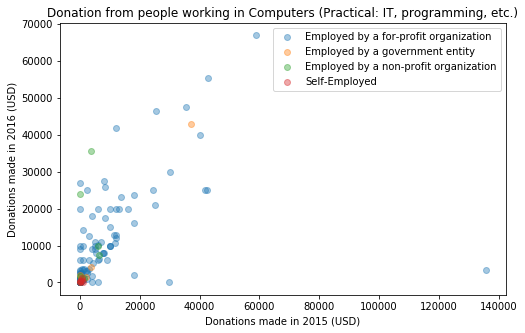

In [25]:
donation_2015on2016('Computers (Practical: IT, programming, etc.)')

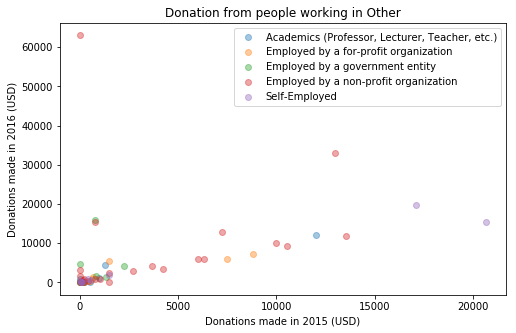

In [26]:
donation_2015on2016('Other')

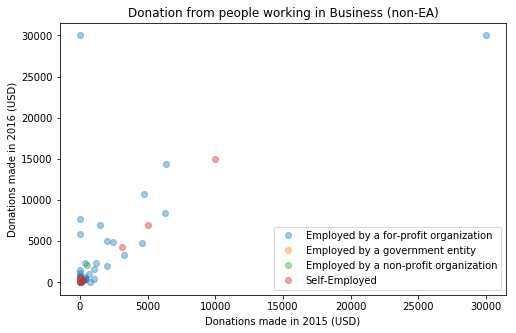

In [27]:
donation_2015on2016('Business (non-EA)')

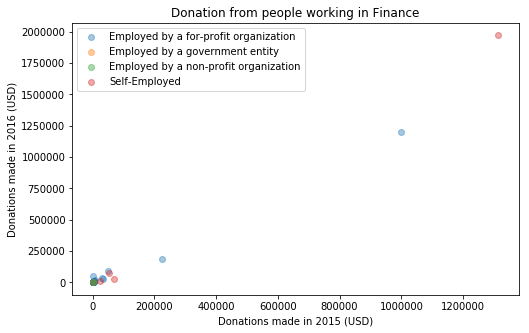

In [28]:
donation_2015on2016('Finance')

In [29]:
survey[survey['field'] == 'Finance'].loc[:, ['id', 'donate_2015_c', 'donate_2016_c']].head()

,id,donate_2015_c,donate_2016_c
188,202,237.36,4391.17
231,245,1314578.68,1971868.02
277,293,40.00,800.00
381,406,1735.24,2149.34
404,431,100.00,0.00


---
### `>>> Let's practice` 
Interactive session in groups, going back on the the American time usage.  
Source https://www.ibm.com/communities/analytics/watson-analytics-blog/american-time-use-survey

1. As a group explore and decide the major hypothesis and insights you want to deepen
2. Use Matplotlib and Seaborn (and Pandas if necessary) to visualise and rapprensent hypothesis and insights
3. Choose one particular exploration and insight you want to share with the rest of the class

In [30]:
time_survey = pd.read_csv('../../BDINTESA3/Data_Science/data/WA_American-Time-Use-Survey-lite.csv')

In [ ]:
# 1  
# Using Pandas to decide what to explore (you can merge together the individual work of last week)

In [33]:
time_survey.columns

Index(['Education Level', 'Age', 'Age Range', 'Employment Status', 'Gender',
       'Children', 'Weekly Earnings', 'Year', 'Weekly Hours Worked',
       'Sleeping', 'Grooming', 'Housework', 'Food & Drink Prep',
       'Caring for Children', 'Playing with Children', 'Job Searching',
       'Shopping', 'Eating and Drinking', 'Socializing & Relaxing',
       'Television', 'Golfing', 'Running', 'Volunteering'],
      dtype='object')

In [36]:
time_survey['Age Range'].unique()

array(['50-59', '40-49', '20-29', '30-39', '80+', '60-69', '0-19',
       '70-79'], dtype=object)

In [46]:
time_survey_sel = time_survey.loc[time_survey['Age Range'].isin(['50-59', '40-49', '20-29', '30-39', '60-69'])]

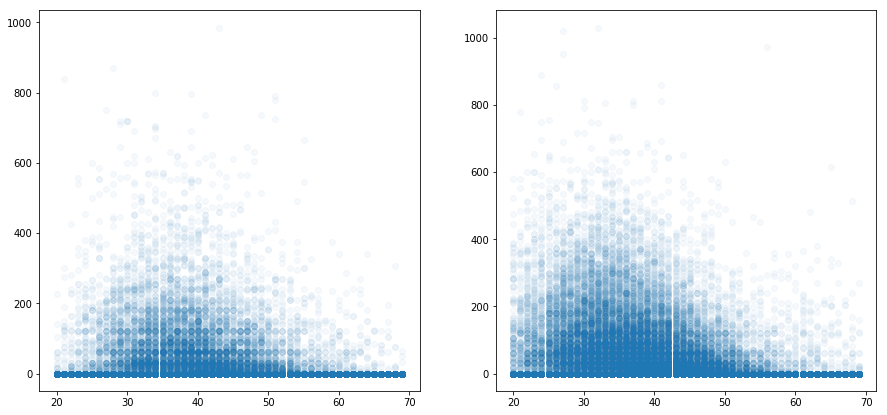

In [63]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(x=time_survey_sel['Age'][time_survey_sel['Gender']=='Male'], y=time_survey_sel['Caring for Children'][time_survey_sel['Gender']=='Male'],  alpha=0.04)
plt.subplot(1,2,2)
plt.scatter(x=time_survey_sel['Age'][time_survey_sel['Gender']=='Female'], y=time_survey_sel['Caring for Children'][time_survey_sel['Gender']=='Female'],  alpha=0.04)

In [ ]:
# 3
# Choose one insight to dig deeper and to share later with the rest of the class